In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [138]:
# Load dataset and check proportion of class imbalance
train = pd.read_csv(r'C:\Users\hp\Downloads\Train Dataset .csv')
test =  pd.read_csv(r'C:\Users\hp\Downloads\Test Dataset.csv')
print(train['target'].value_counts())

target
1    5941
0    1362
Name: count, dtype: int64


,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,16501,70,1,0,163,495,0,2,170,1,2.0,1,0,1
1,10444,61,1,0,131,238,0,2,74,1,4.9,2,2,2
2,14288,53,1,0,95,558,1,1,73,1,0.7,1,1,0
3,10409,37,0,1,178,287,0,1,192,1,5.7,1,0,0
4,17330,35,0,3,104,281,0,0,122,0,1.3,1,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2692,14964,34,0,3,136,291,0,1,163,0,2.6,2,2,3
2693,16774,72,0,1,104,166,1,2,95,1,0.3,0,2,2
2694,18884,31,1,0,153,457,1,1,170,1,3.8,0,3,1
2695,10000,71,0,0,111,242,1,0,147,1,5.3,0,1,2


## Data Assessment

In [140]:
def assess(data):
    ''' Checks the basic data assessment protocol'''
    print(f'Number of duplicates: {data.duplicated().sum()} \n')
    print(f"Null Values \n{data.isnull().sum()}")
    if data.duplicated().sum() > 0:
        data.drop_duplicates(inplace = True) # drop occurence of duplicate records
    else:
        print("There are no duplicates")
    return data

assess(train)

Number of duplicates: 0 

Null Values 
Id          0
Age         0
Sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
There are no duplicates


,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7298,19401,30,1,2,107,177,1,2,119,0,2.7,1,0,0,0
7299,10446,42,1,2,96,551,1,2,76,0,1.9,2,3,2,1
7300,13219,51,1,0,151,165,1,0,190,1,0.9,0,0,2,1
7301,15349,29,0,0,195,287,1,2,161,1,3.4,1,1,0,1


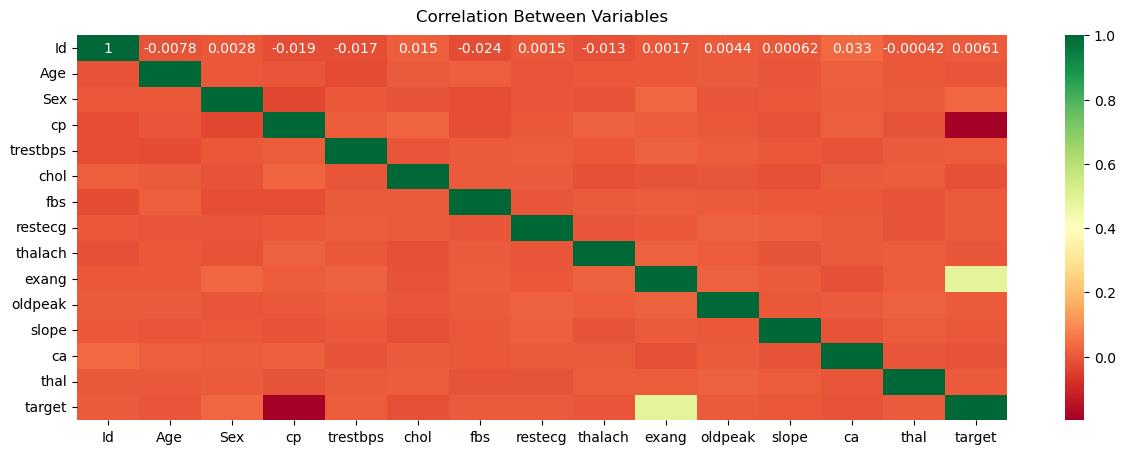

In [141]:
# plotting correlation
plt.figure(figsize=(15,5))
sns.heatmap(train.corr(), annot=True, cmap="RdYlGn")
plt.title('Correlation Between Variables', pad = 10)
plt.show()

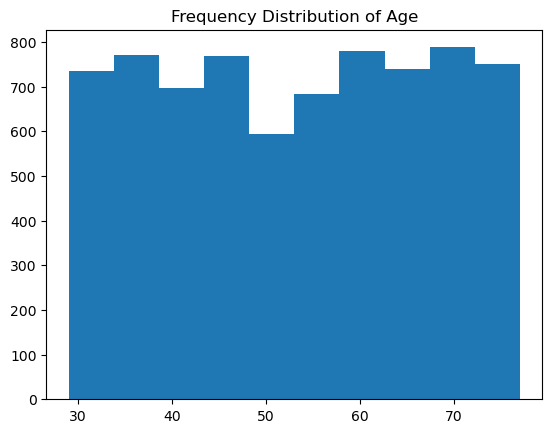

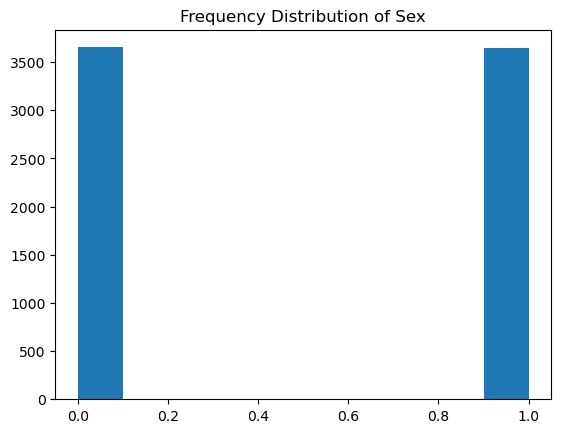

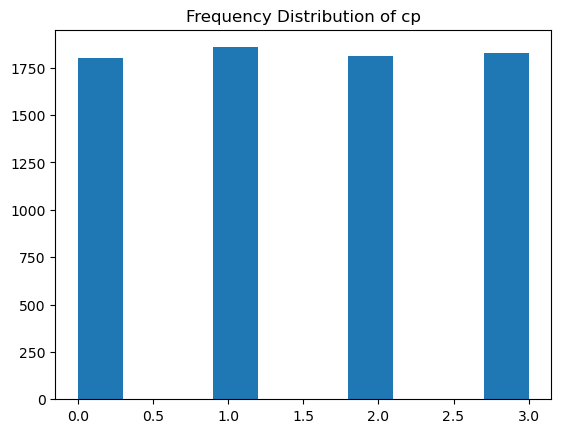

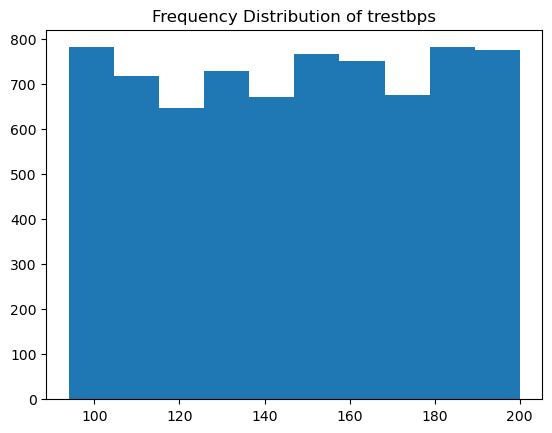

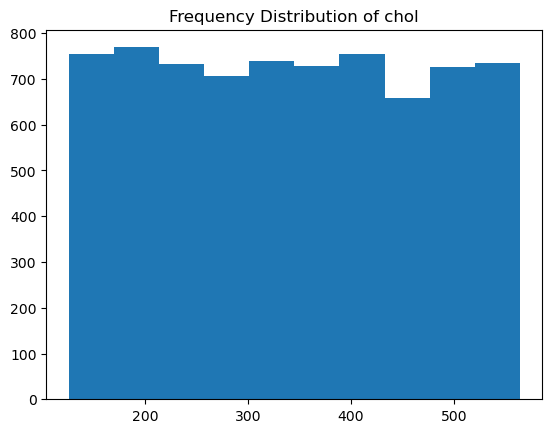

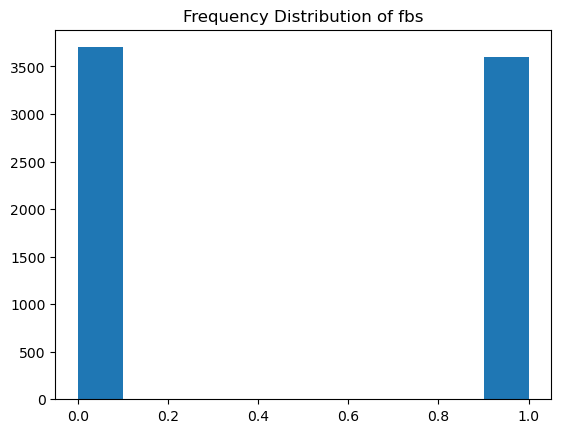

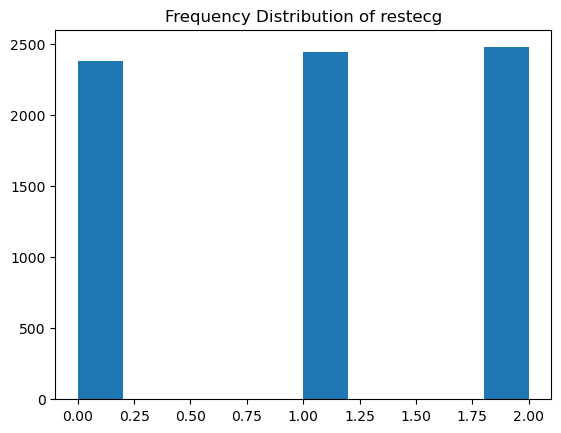

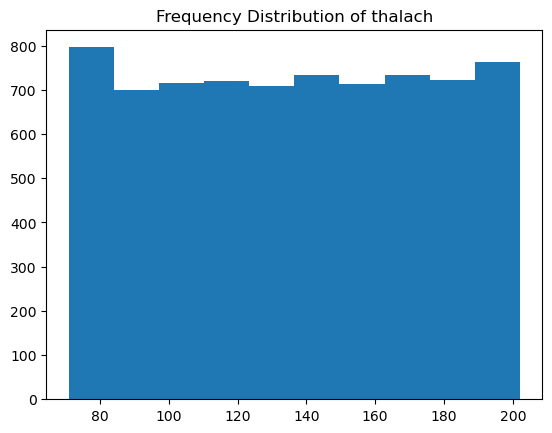

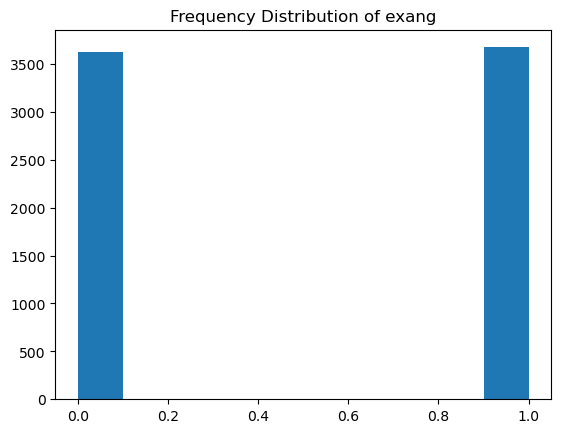

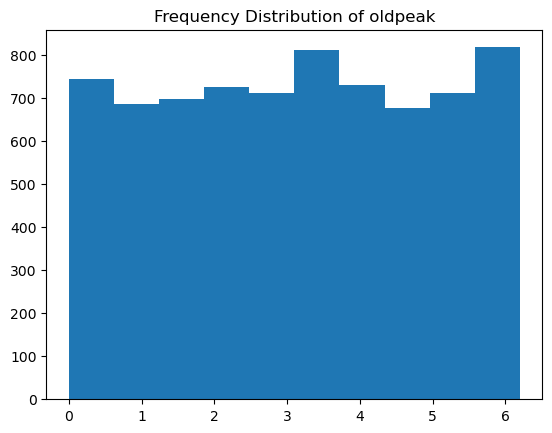

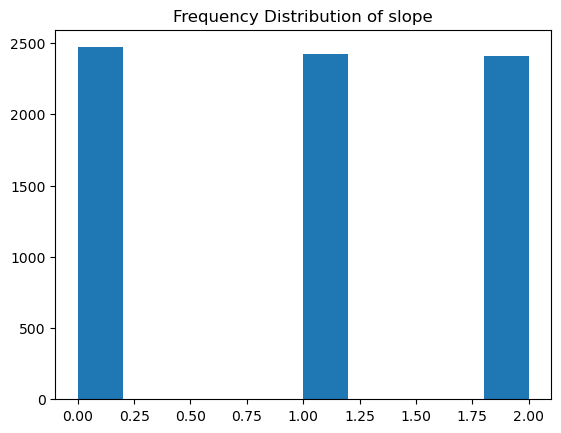

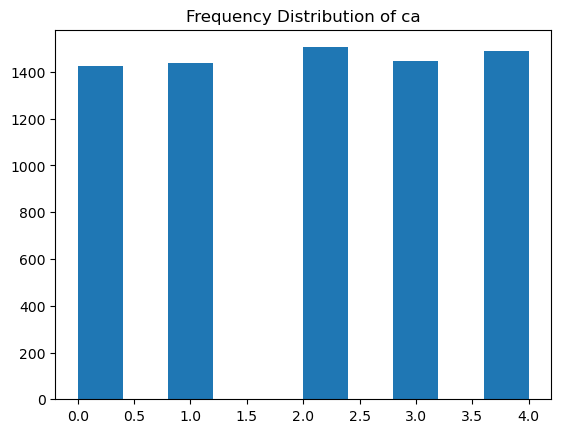

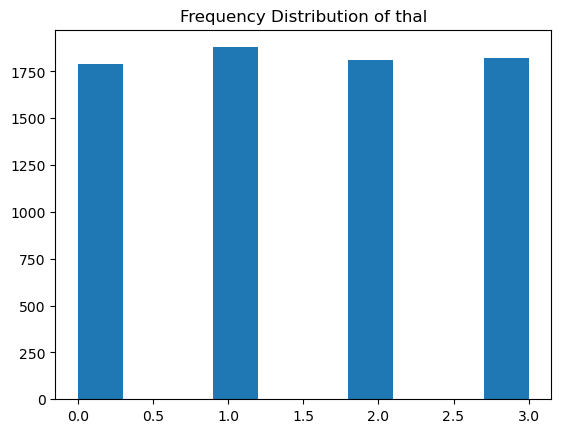

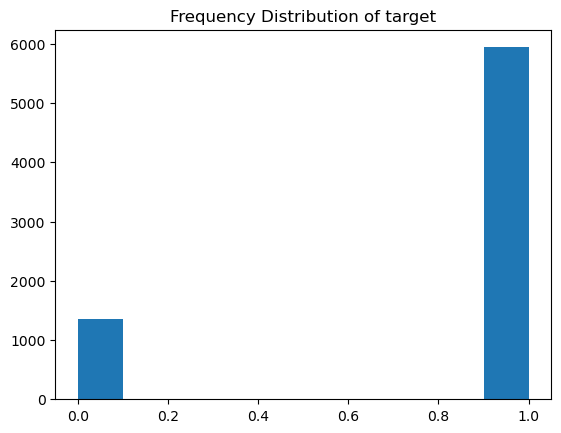

In [144]:
# check distribution of the variables
for col in train.columns.tolist()[1:]:
    plt.hist(train[col])
    plt.title(f'Frequency Distribution of {col}')
    plt.show() 

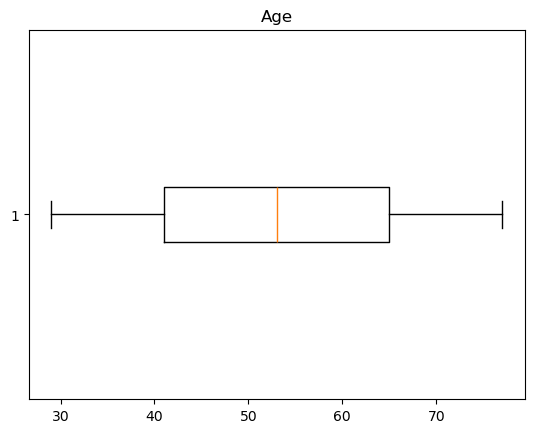

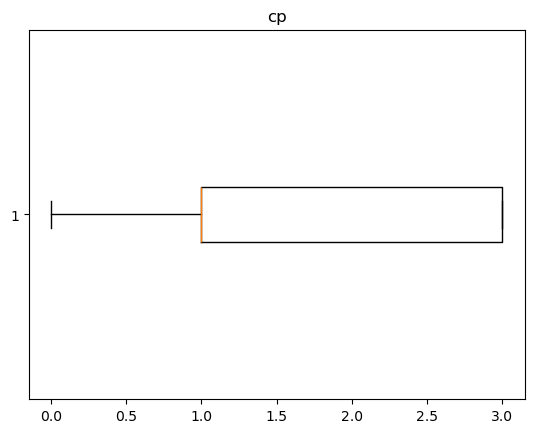

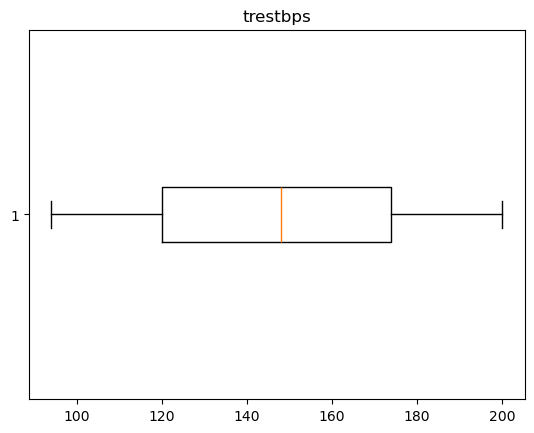

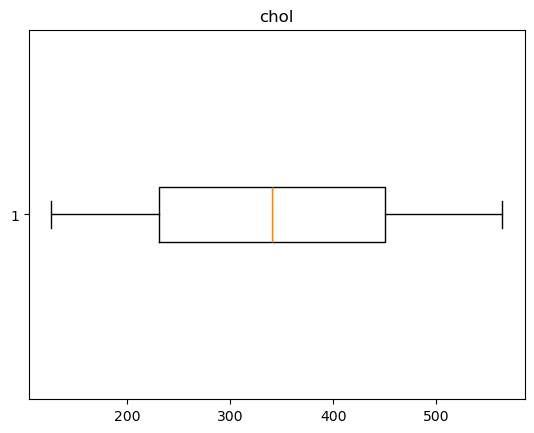

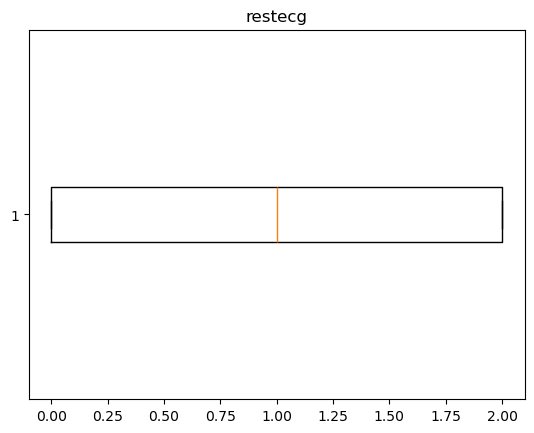

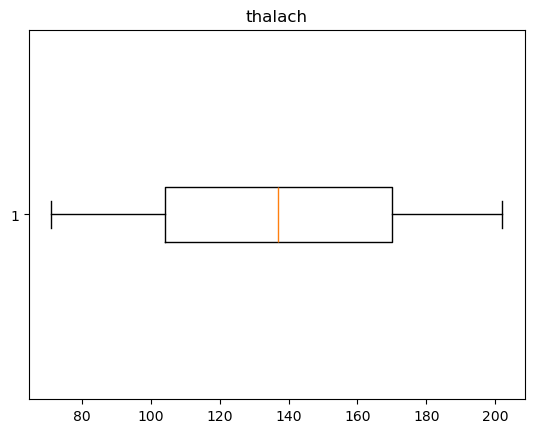

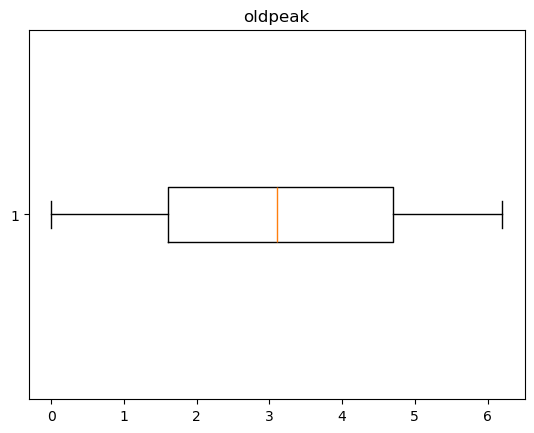

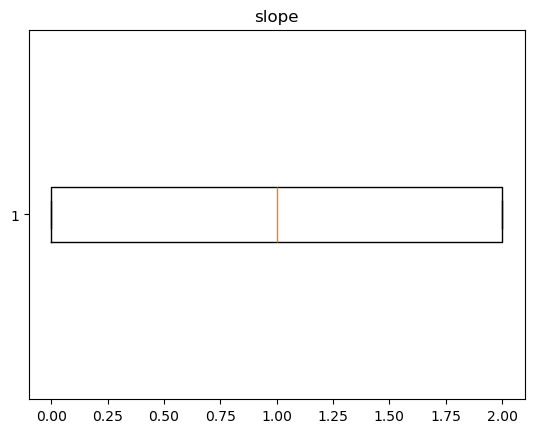

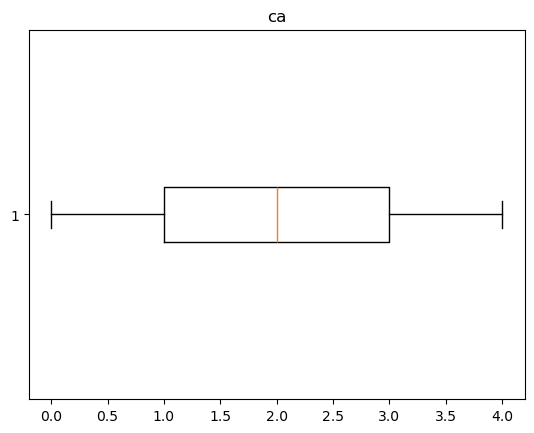

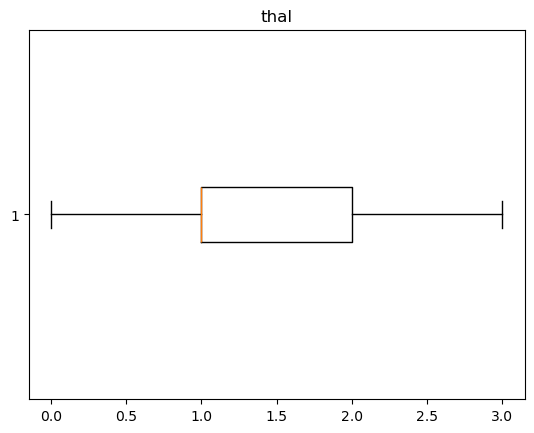

In [146]:
def check_outliers(data):
    '''checks outliers but for none binary data'''
    for column in data.columns.tolist()[1:]:
        if data[column].isin([0, 1]).all():
            continue

        plt.boxplot(data[column], vert = False)
        plt.title(column)
        plt.show()

check_outliers(train)
        

## Exploratory Data Analysis

### The basis of this EDA is to  determine possible features or characteristics that patient with heart disease possess but not seen in patient without heart disease. 

#### 1: Identify Patients with Heart Disease by Age and Sex

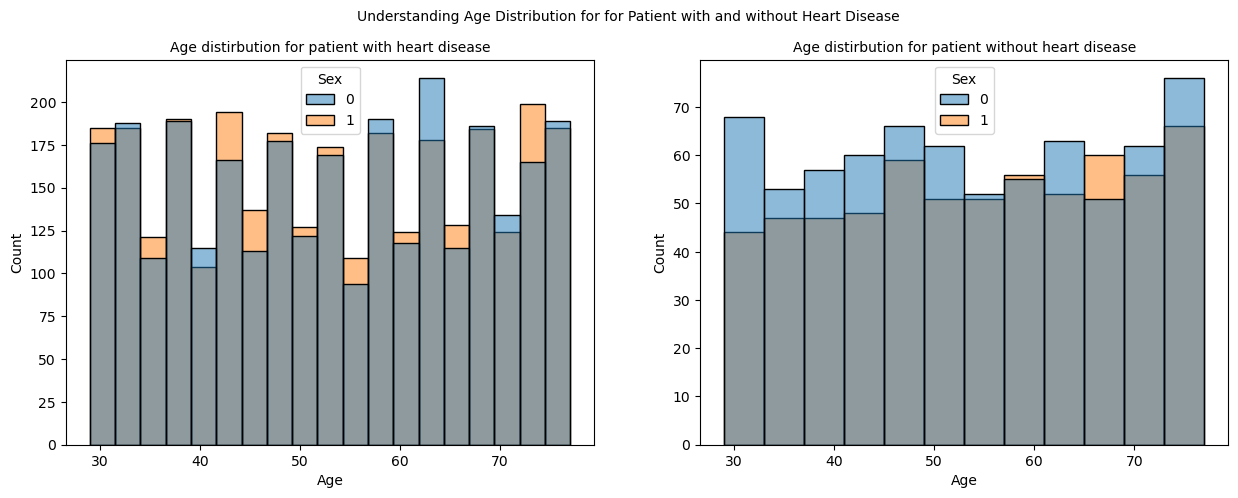

In [150]:
target_1 = train[train['target'] == 1]
target_0 = train[train['target'] == 0]

fig, ax = plt.subplots(1,2, figsize = (15,5))
fig.suptitle('Understanding Age Distribution for for Patient with and without Heart Disease', size = 10)
sns.histplot(data = target_1, x = 'Age', hue ='Sex', ax = ax[0])
ax[0].set_title('Age distirbution for patient with heart disease', size = 10)

sns.histplot(data = target_0, x = 'Age', hue ='Sex', ax = ax[1])
ax[1].set_title('Age distirbution for patient without heart disease', size = 10)

plt.show()

### 2: Comparing variables to understand potential causes or features attributed to heart disease.

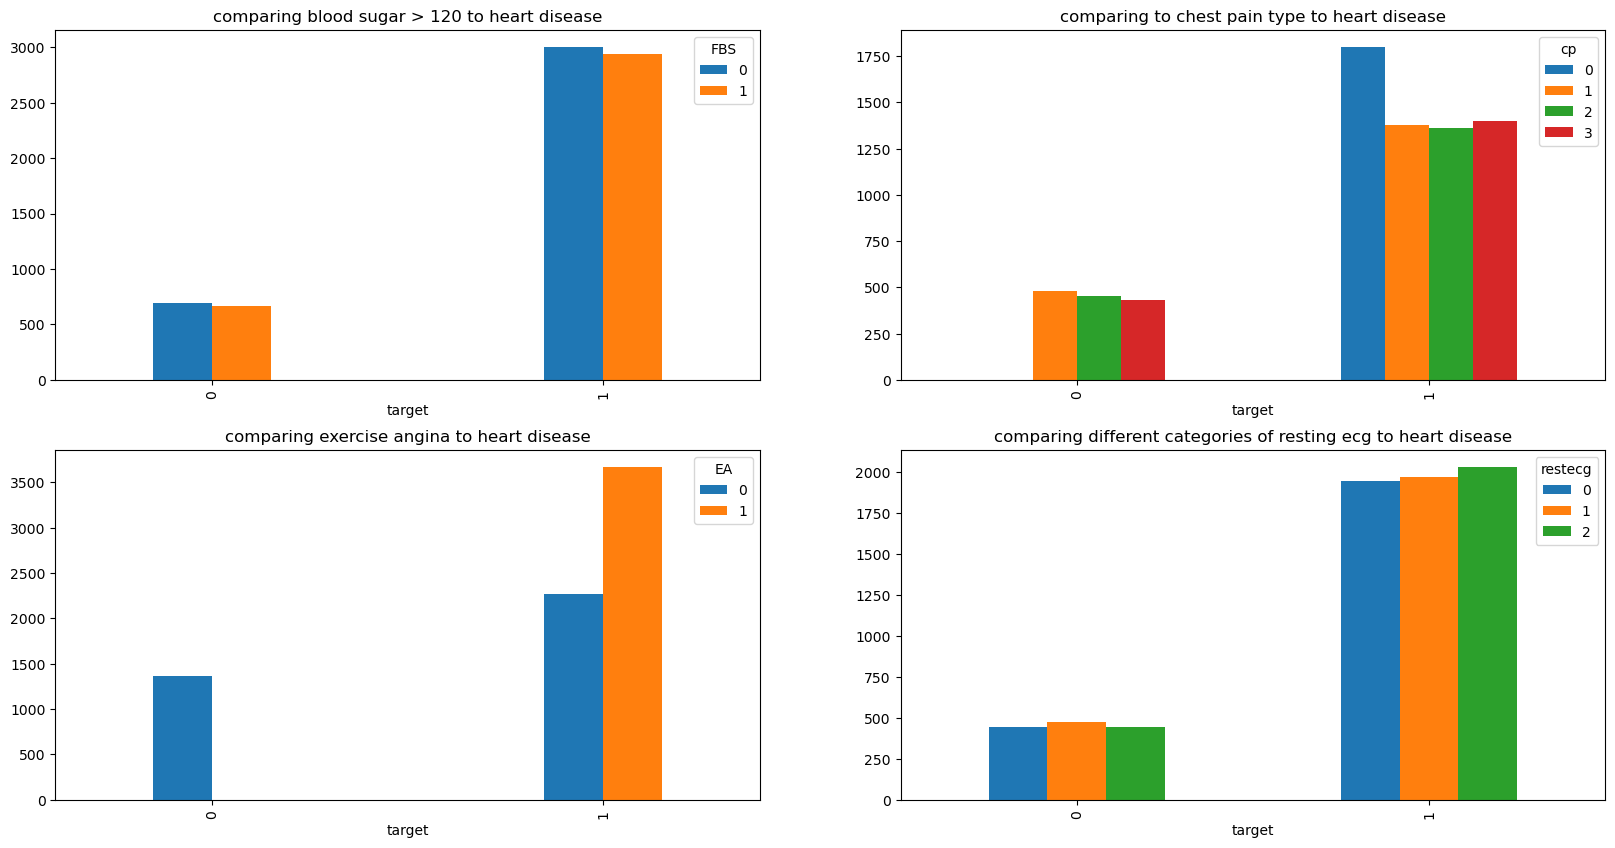

In [152]:
fig, ax = plt.subplots(2,2, figsize = (20, 10))

pd.crosstab(train['target'], train['fbs']).plot(kind = 'bar', width = 0.3, ax = ax[0,0])
ax[0,0].legend(title = 'FBS')
ax[0,0].set_title('comparing blood sugar > 120 to heart disease')

pd.crosstab(train['target'], train['cp']).plot(kind = 'bar', ax = ax[0,1])
ax[0,1].set_title('comparing to chest pain type to heart disease')

pd.crosstab(train['target'], train['exang']).plot(kind = 'bar', width = 0.3, ax = ax[1,0])
ax[1,0].legend(title = 'EA', loc = 0)
ax[1,0].set_title('comparing exercise angina to heart disease')

pd.crosstab(train['target'], train['restecg']).plot(kind = 'bar', ax = ax[1,1])
ax[1,1].set_title('comparing different categories of resting ecg to heart disease')

plt.show()

## Training Model

In [185]:
# Base Model using Logistics Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = train.drop(columns=['target', 'Id'])  # separate into dependent and independent(x) variables
y = train['target']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #split dataset

In [186]:
def base_model(x, y, x_test = x_test, y_test = y_test):
    model = LogisticRegression()
    model.fit(x, y)
    y_pred = model.predict(x_test)
    train_pred = model.predict(x_train)
    print(f'test_acc: {round(accuracy_score(y_test, y_pred),2)}')
    print(f'train_acc: {round(accuracy_score(y_train, train_pred),2)}')
base_model(x_train, y_train)

test_acc: 0.82
train_acc: 0.81


## Feature Selection

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7298,19401,30,1,2,107,177,1,2,119,0,2.7,1,0,0,0
7299,10446,42,1,2,96,551,1,2,76,0,1.9,2,3,2,1
7300,13219,51,1,0,151,165,1,0,190,1,0.9,0,0,2,1
7301,15349,29,0,0,195,287,1,2,161,1,3.4,1,1,0,1
